In [1]:
using Pkg

#Pkg.activate("path/to/project")
Pkg.activate("~/CodeProjects/RosenbluthChains/")
###julia ]; activate ; dev --local PathToRosenbluthPackage
#Pkg.instantiate()
using RosenbluthChains, Plots

  Activating project at `~/Code_Projects/rosenbluthchains/~/CodeProjects/RosenbluthChains`


### Define a measurement which only saves the positions of one configuration

In [2]:
### type definition
mutable struct My_Measurement{T<:Real} <: AbstractMeasurement 
    x::Vector{T}
    y::Vector{T}
    z::Vector{T}
end
My_Measurement(N::Int) = My_Measurement{Float64}(zeros(N), zeros(N), zeros(N)) ### constructs a Measurement 

### initialise measurments with empty vectors
function RosenbluthChains.InitMeasurement(data::SimData, param::SimulationParameters, Tmp::My_Measurement) 
    return My_Measurement(data.NBeads)
end 


### does nothing
function RosenbluthChains.MeasureAfterBatch(data::SimData, param::SimulationParameters, Measurement::My_Measurement) 
    nothing
end

function RosenbluthChains.MeasureAfterChainGrowth(data::SimData, param::SimulationParameters,Measurement::My_Measurement) 
    Measurement.x = getindex.(data.xyz, 1) ### gets the first element for each element of data.xyz
    Measurement.y = getindex.(data.xyz, 2) ### gets the second element for each element of data.xyz
    Measurement.z = getindex.(data.xyz, 3) ### gets the third element for each element of data.xyz
end

### does nothing
function SaveMeasurements(data::SimData, param::SimulationParameters,Measurement::My_Measurement) 
    nothing
end

SaveMeasurements (generic function with 1 method)

### Example for Fixed Radius, Random Bond Angles, Random, Dihedral Angles and No nonbonded Interactions

In [3]:
### define the modelling of a protein/polymer
r =1.0
My_Polymer_Model = SimulationParameters( FixedBondParameters(r),RandBondAngle(), RandTorsion(), IdealChain())

SimulationParameters{Float64, Int64}(FixedBondParameters{Float64}(1.0), RandBondAngle(), RandTorsion(), IdealChain())

In [4]:
### define the meta parameters for the simulation
PathToFolder="./test/" ### folder path that can be used to store data
My_Number = 1.0 ### Only used to determine type => could and should be done in a nicer way
NBeads = 100 ### number of beads in a polymer
NTrial = 8 ### number of trials positions that are tried at each move
PolymerConfigurationPerBacth = 1 ### we create 1 polymer per batch
N_Batches = 1 ### we simulate for 1 beach => we create one polymer 

My_Simulation_Data = SimData(PathToFolder, 1.0, NBeads, NTrial, PolymerConfigurationPerBacth, N_Batches)

SimData{Float64, Int64}("./test/", 100, 8, 1, 1, 1.0, 1, 1, -1, 0, 0, StaticArraysCore.MVector{3, Float64}[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]  …  [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], StaticArraysCore.MVector{3, Float64}[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0,

In [5]:
Result = RunSim(My_Simulation_Data,My_Polymer_Model, My_Measurement(My_Simulation_Data.NBeads));

### plot of the polymer model in the last result

┌ Warning: Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotat

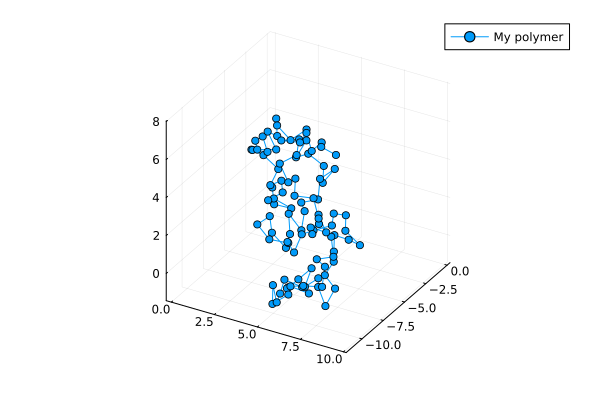

In [6]:
Plots.plot(Result.x, Result.y, Result.z, marker=:dot, label="My polymer")

### Exercise Define a polymer with fixed BondAngles using the preimplemented version in SpecificModels.jl

In [7]:
# the input for the struct is a vector of set bond angles of length n
# the angle between beads i, i+1, i+2 is defined by vector element array[i+2] 

### Exercise Implement a harmonic bond angle potential.
### You can follow the steps done for the harmonic bond length potential


In [14]:
#https://hoomd-blue.readthedocs.io/en/v4.7.0/module-md-angle.html#hoomd.md.angle.Harmonic
mutable struct HarmonicBondLength{T<:Real} <: RosenbluthChains.AbstractBondParam 
    k  ::T ### bond strength for all particles
    r0 ::T ### minima of the bond length potential
    Δr ::T ### sampling width=> take values from interval [r0-Δr, r0+Δr]
end
HarmonicBondLength(k ::T, r0::T, Δr::T) where {T<:Real} = HarmonicBondLength{T}(k, r0, Δr) ### constructs a Measurement 

@inline function SetTrialRadius(data::SimData, param::HarmonicBondLength)
   rand!(data.trial_radius, eltype(data.TType)) ### created NTrial many random number ∈ [0,1]
   data.trial_radius .*= 2.0*param.Δr ### ∈ [0, 2Δr]
   data.trial_radius .+= param.r0-param.Δr ### ∈ [r0-Δr, r0+Δr]
   return nothing
end


@inline function GetTrialBoltzmannWeight(data::SimData,param::HarmonicBondLength) 
    fill!(data.tmp4, 0.0) ### temporary array of length NTrials that i will use to store the energy

    data.tmp4  .= @. 1.0/2.0*(data.trial_radius-r0)^2 ### compute energies

    ### here comes a numerical trick to stabilise, we add the energies of al potentials first and take the exponential in "GetTrialBoltzmannWeight" before we have to choose the positions in "ChooseTrialPosition"
    # -= since we have to add all energies and take exp(-kt*E); kt=1
    data.LogBoltzmannFaktor .-= data.tmp4
    return nothing
end


GetTrialBoltzmannWeight (generic function with 1 method)

In [15]:
My_New_Polymer_Model = SimulationParameters( HarmonicBondLength(10.0, 4.0, 1.0 ),RandBondAngle(), RandTorsion(), IdealChain())

SimulationParameters{Float64, Int64}(HarmonicBondLength{Float64}(10.0, 4.0, 1.0), RandBondAngle(), RandTorsion(), IdealChain())

In [16]:
New_Result = RunSim(My_Simulation_Data,My_Polymer_Model, My_Measurement(My_Simulation_Data.NBeads));

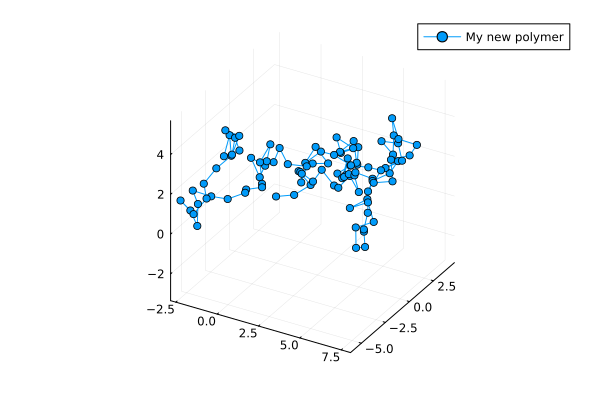

In [18]:
Plots.plot(New_Result.x, New_Result.y, New_Result.z, marker=:dot, label="My new polymer")

### Advanced Exercise: How can you check whether my implementation follows the distribution i claim? Implement it as a measurement

### Solution: Tests
Many implementations can be found in folder ./tests/
Histogram of the distances betweens bonds should follow the relation P(r) = exp(-1/(kbT)*E(r))/Z 

The tests will be statistical, therefore we need to think about when we reject/accept the result.

### Optional Fun Exercise: 
Use the julia animations at https://docs.juliaplots.org/latest/animations/ to visualise how a chain is grown iteratively.
A gif is automatically generated by combining multiple pictures. Therefore it is probably easiest to duplicate the mainLoop here and modify some of the code to get the trial positions, weights etc. for visualisation purposes. This will also make you familiar with some of the steps in the simulation.

Science communication: How can i show someone the main steps/concepts of what i do? Pictures are often very helpful. 
Probably also helpful for your report.